In [1]:
import tensorflow as tf

from model_v2 import ModelV2
from data_loader import load_evaluation_data, TrainingDataLoader
from constants import assignments, x, y

In [2]:
sess = tf.InteractiveSession()

In [3]:
training_loader = TrainingDataLoader(
  'localhost:5000',
  batch_size=25,
  image_size=100,
)

In [39]:
assignments['log_learning_rate'] = -5.
model = ModelV2()
sess.run(tf.global_variables_initializer())

In [ ]:
exp_avg = None
for _ in range(10000):
    batch = training_loader.load_batch()
    loss = model.train_batch(sess, batch)
    if exp_avg is None:
        exp_avg = loss
    else:
        exp_avg = .9 * exp_avg + .1 * model.train_batch(sess, batch)
    print(exp_avg)

0.62101173
0.623271805047989
0.6234066265821457
0.6223185102343559
0.6172098076522351
0.6191393276613951
0.6201009697224498
0.619650084957999
0.6181155018677015


In [31]:
evaluation_data = load_evaluation_data(
  'localhost:5000'
)

In [36]:
def evaluate_model():
    count = 10
    x_eval, y_eval = evaluation_data
    n = 0
    total = 0.
    for i in range(0, len(x_eval), count):
        end = min(i + count, len(x_eval))
        spliced = x_eval[i:end], y_eval[i:end]
        total += model.evaluate(sess, spliced)
        n += 1
        print('average loss', total / n)
    return total / n

In [37]:
evaluate_model()

average loss 0.9992262125015259
average loss 0.9976198077201843
average loss 0.9975027044614156
average loss 0.9976206421852112
average loss 0.9967493295669556


KeyboardInterrupt: 

In [12]:
import matplotlib.pyplot as plt

In [13]:
x_eval, y_eval = training_loader.load_batch()
shape = x_eval.shape[1:3]

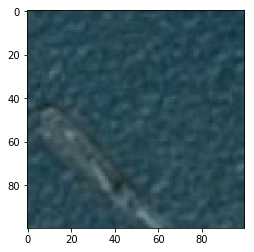

In [14]:
plt.imshow(x_eval[0])

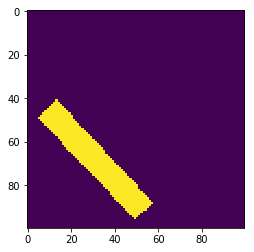

In [15]:
plt.imshow(y_eval[0].reshape(shape))

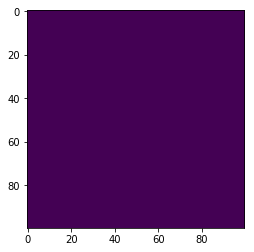

In [27]:
predicted = model.forward(sess, x_eval[:1])[0].reshape((shape))
plt.imshow(predicted)

In [28]:
import numpy as np
predicted

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)